In [1]:
# Tutorial-specific dependencies
import sys, os            # used to set $PATH
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../')))

import subprocess         # used to run the api server in the background

# GillesPy2

import gillespy2
import numpy

# StochSS-Compute

from stochss_compute import RemoteSimulation

# Dask

from distributed import Client

In [2]:
class MichaelisMenten(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Michaelis_Menten")
            
            ''' 
            PARAMETERS:
            These are constant values relevant to the system, such as reaction kinetic rates.
            
            name: user defined name for reference
            expression: constant value
            '''
            rate1 = gillespy2.Parameter(name='rate1', expression= 0.0017)
            rate2 = gillespy2.Parameter(name='rate2', expression= 0.51)
            rate3 = gillespy2.Parameter(name='rate3', expression = 0.11)
            
            # Add parameters to the model
            self.add_parameter([rate1,rate2,rate3])
            
            '''
            SPECIES:
            These can be anything that participates in or is produced by a reaction channel.
            
            name: A user defined name for the species
            initial_value: value/population count of species at start of simulation
            '''
            A = gillespy2.Species(name='A', initial_value=301)
            B = gillespy2.Species(name='B', initial_value=121)
            C = gillespy2.Species(name='C', initial_value=0)
            D = gillespy2.Species(name='D', initial_value=0)
            
            # Add species to the model
            self.add_species([A, B, C, D])
            
            '''Reactions:
            These are the reaction channels causing the system to change over time
            
            name: a user defined name for the reaction
            reactants: dictionary with participant reactants as keys, and consumed per reaction as value.
            products: dictionary with reaction products as keys, and number formed per reaction as value.
            rate: parameter rate constant to be applied to the propensity of this reaction firing
            propensity_function: can be used instead of rate in order to declare a custom propensity function in string format'''
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={C:1},
                   rate=rate1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={C:1}, products={A:1,B:1},
                    rate=rate2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={B:1,D:1},
                    rate=rate3)
            
            # Add reactions to the model
            self.add_reaction([r1,r2,r3])
            
            # Set timespan of model
            self.timespan(numpy.linspace(0,1000,101))

In [3]:
model = MichaelisMenten()

# myServer = ComputeServer("localhost")

In [11]:
solver = gillespy2.NumPySSASolver(model=model)
simulation = RemoteSimulation(
    model=model, host='localhost', solver = type(solver))


results = simulation.run()


[SimulationRunRequest] http://localhost:29681/api/v2/simulation/gillespy2/run


[GET] http://localhost:29681/api/v2/simulation/gillespy2/89a813953d334e239852436b3fe961d2/status
Results ready. Fetching.......
[GET] http://localhost:29681/api/v2/simulation/gillespy2/89a813953d334e239852436b3fe961d2/results


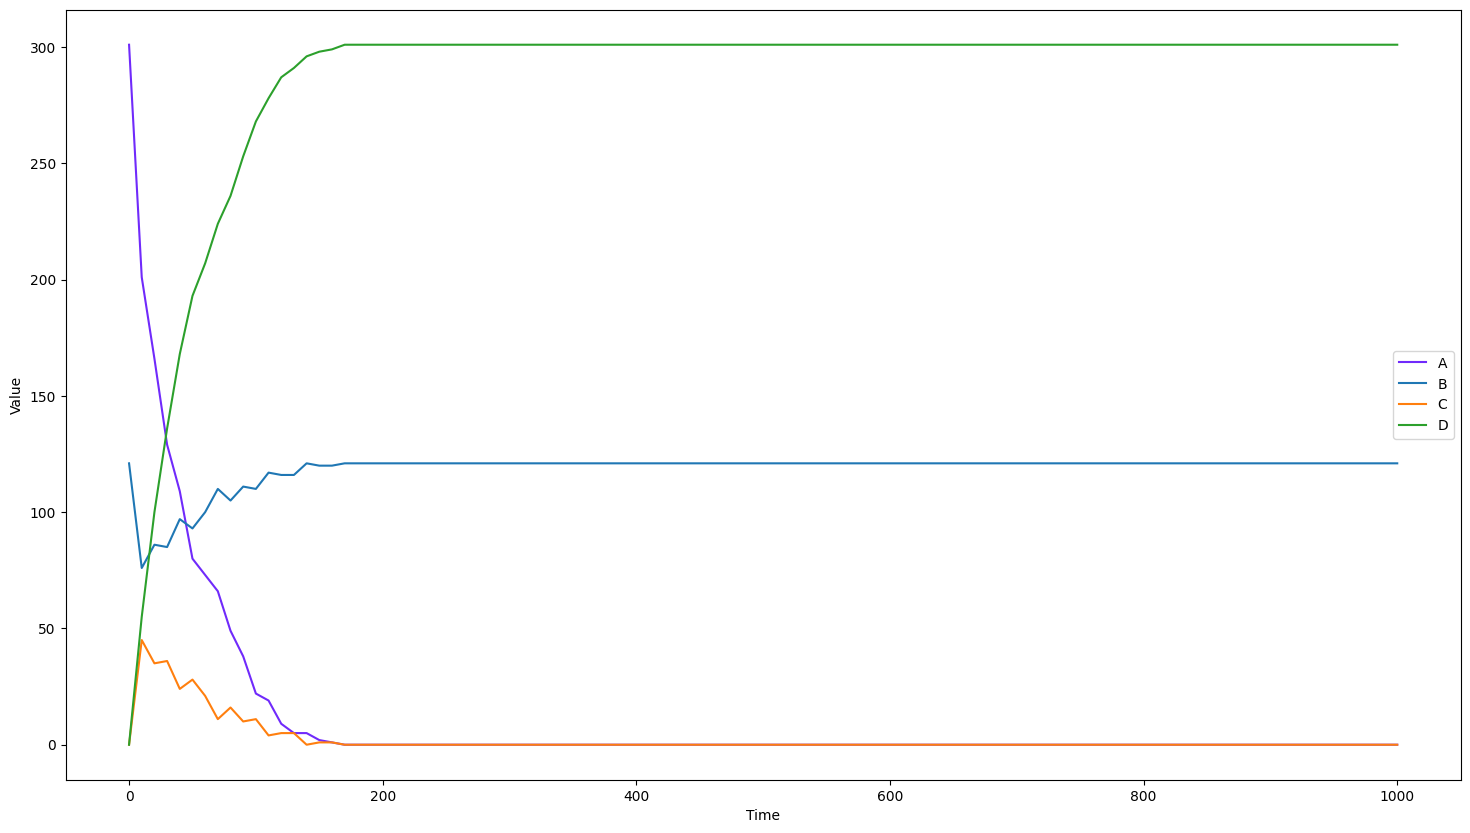

In [12]:
results.plot()